In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_headings = pd.read_csv('./Logs/RTI_Class_headings_Alejandre_27_M_1.csv')
data_positions = pd.read_csv('./Logs/RTI_Class_headings_Alejandre_27_M_1.csv')

In [8]:
data_headings.head(15)

,time,progress,x,y,z
0,0.000000,0,0.000000,0.000000,1.000000
1,1.013874,0,0.000000,0.182236,0.983255
2,2.000381,0,-0.172774,0.100188,0.979853
3,3.013874,0,-0.977704,0.052336,0.203363
4,3.999687,0,-0.944623,0.069756,0.320656
5,5.012272,0,-0.791641,0.104529,0.601978
6,5.996059,0,-0.894900,0.008727,-0.446181
7,6.998314,0,-0.833497,0.030539,-0.551680
8,8.011684,0,-0.329436,0.039260,-0.943361
9,9.008610,0,-0.061039,0.017452,-0.997983


In [9]:
data_positions.head(15)

,time,progress,x,y,z
0,0.000000,0,0.000000,0.000000,1.000000
1,1.013874,0,0.000000,0.182236,0.983255
2,2.000381,0,-0.172774,0.100188,0.979853
3,3.013874,0,-0.977704,0.052336,0.203363
4,3.999687,0,-0.944623,0.069756,0.320656
5,5.012272,0,-0.791641,0.104529,0.601978
6,5.996059,0,-0.894900,0.008727,-0.446181
7,6.998314,0,-0.833497,0.030539,-0.551680
8,8.011684,0,-0.329436,0.039260,-0.943361
9,9.008610,0,-0.061039,0.017452,-0.997983


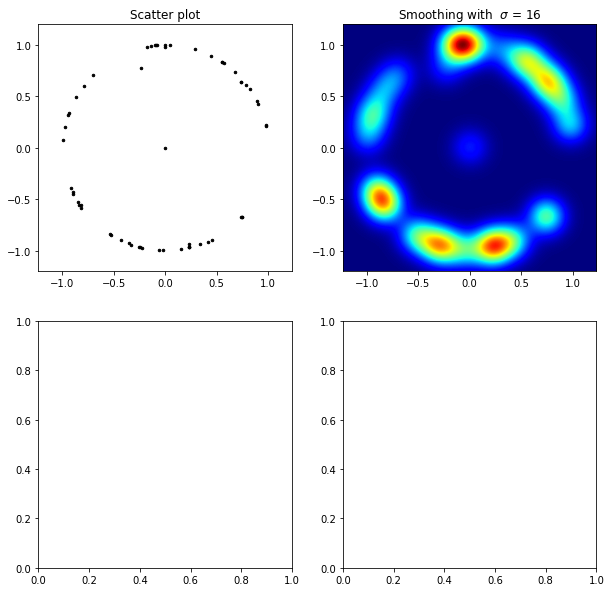

In [12]:
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter

def heatmap(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    margin = 0
    extent = [xedges[0]-margin, xedges[-1]+margin, yedges[0]-margin, yedges[-1]+margin]
    return heatmap.T, extent

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sigmas = [0, 16, 32, 64]

x = list(data_headings.x)
x.append(-1.5)
x.append(1.5)

z = list(data_headings.z)
z.append(-1.5)
z.append(1.5)

for ax, s in zip(axs.flatten(), sigmas):
    ax.axis('equal')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    if s == 0:
        ax.plot(x, z, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = heatmap(x, z, 40)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

        plt.show()
           

float32
(1003, 1003, 4)


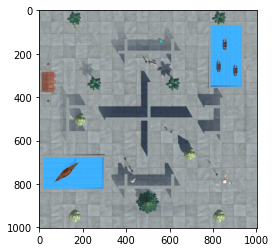

In [14]:
from matplotlib import image
from matplotlib import pyplot

# load image as pixel array
image = image.imread('plan.png')
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

In [16]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [18]:
split_idx = data_positions[data_positions.progress == 0].index[-1] + 3

In [36]:
def p(a, b, c, d):
    #plt.figure(figsize=(10, 10))
    #plt.axis('equal')
    plt.xlim(0, 1003)
    plt.ylim(0, 1003)

    delta_x = a
    delta_z = b

    c_x = -c
    c_z = -d

    plt.imshow(image[:, ::-1])
    
    plt.plot(c_x*data_positions.x[:split_idx] + delta_x,
             c_z*data_positions.z[:split_idx] + delta_z,
             linewidth=3)
    plt.plot(c_x*data_positions.x[split_idx-1:] + delta_x,
             c_z*data_positions.z[split_idx-1:] + delta_z,
             linewidth=3)
    error = np.sqrt(np.power(data_positions.x.iloc[-1] - data_positions.x.iloc[0], 2) + \
            np.power(data_positions.z.iloc[-1] - data_positions.z.iloc[0], 2))
    print('Error:', round(error, 2), 'GU')

Error: 1.0 GU


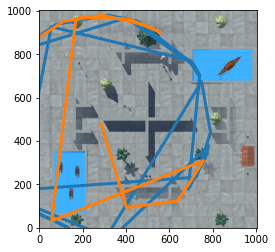

<function __main__.p(a, b, c, d)>

In [37]:
c_x = image.shape[0]/(data_positions.x.max() - data_positions.x.min()) - 0.03
c_z = image.shape[1]/(data_positions.z.max() - data_positions.z.min()) - 0.05
interact(p, a=284, b=480, c=c_x, d=c_z)

In [21]:
data_positions[data_positions.progress == 1]

,time,progress,x,y,z
40,39.99990,1,-0.223819,-0.100188,-9.694676e-01
41,40.99609,1,0.742968,-0.021815,-6.689715e-01
42,42.01387,1,0.737214,-0.013090,-6.755324e-01
43,43.01186,1,0.341861,-0.030539,-9.392544e-01
44,44.01387,1,-0.017404,-0.074109,-9.970983e-01
45,45.01387,1,-0.429032,-0.082808,-8.994855e-01
46,46.00402,1,-0.538705,-0.091502,-8.375109e-01
47,46.99570,1,-0.524212,-0.087156,-8.471165e-01
48,47.99632,1,-0.257628,-0.095846,-9.614789e-01
49,49.01191,1,0.150907,-0.126199,-9.804597e-01


In [22]:
data_positions.x.iloc[-1]

0.0